<a href="https://colab.research.google.com/github/milnico/latent-space-analysis/blob/main/Analisi_test_item_esempio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-roberta-large-v1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [3]:
items = ["I am the life of the party.",
"I don't talk a lot.",
"I feel comfortable around people.",
"I keep in the background.",
"I start conversations.",
"I have little to say.",
"I talk to a lot of different people at parties.",
"I don't like to draw attention to myself.",
"I don't mind being the center of attention.",
"I am quiet around strangers.",
"I get stressed out easily.",
"I am relaxed most of the time.",
"I worry about things.",
"I seldom feel blue.",
"I am easily disturbed.",
"I get upset easily.",
"I change my mood a lot.",
"I have frequent mood swings.",
"I get irritated easily.",
"I often feel blue.",
"I feel little concern for others.",
"I am interested in people.",
"I insult people.",
"I sympathize with others' feelings.",
"I am not interested in other people's problems.",
"I have a soft heart.",
"I am not really interested in others.",
"I take time out for others.",
"I feel others' emotions.",
"I make people feel at ease.",
"I am always prepared.",
"I leave my belongings around.",
"I pay attention to details.",
"I make a mess of things.",
"I get chores done right away.",
"I often forget to put things back in their proper place.",
"I like order.",
"I shirk my duties.",
"I follow a schedule.",
"I am exacting in my work.",
"I have a rich vocabulary.",
"I have difficulty understanding abstract ideas.",
"I have a vivid imagination.",
"I am not interested in abstract ideas.",
"I have excellent ideas.",
"I do not have a good imagination.",
"I am quick to understand things.",
"I use difficult words.",
"I spend time reflecting on things.",
"I am full of ideas."]

n_factors = 5
n_items_per_factor = 10

factors = [np.ones(n_items_per_factor)*(i+1) for i in range(n_factors)]
factors = np.concatenate(factors)

In [4]:
embeddings = model.encode(items)

(50, 2)


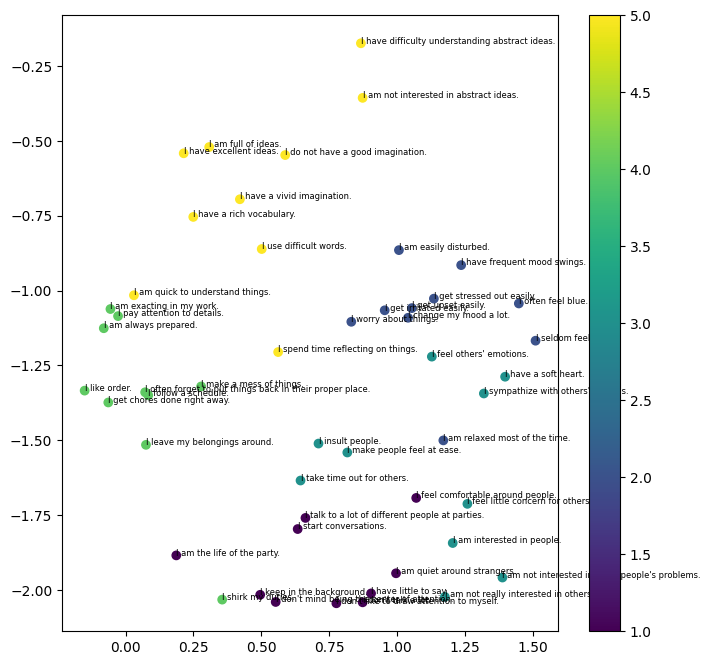

In [5]:


# We want to get TSNE embedding with 2 dimensions
# Perplexity must be lower than items number
tsne = TSNE(n_components=2, verbose=0, perplexity=len(items)-7, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)
x = tsne_result[:,0]
y = tsne_result[:,1]
print(tsne_result.shape)
plt.figure(figsize=(8,8))

sc = plt.scatter(x,y,c=factors)

plt.colorbar()
for xi, yi, pidi in zip(x,y,items):
    plt.annotate(pidi, xy=(xi,yi),fontsize=6)

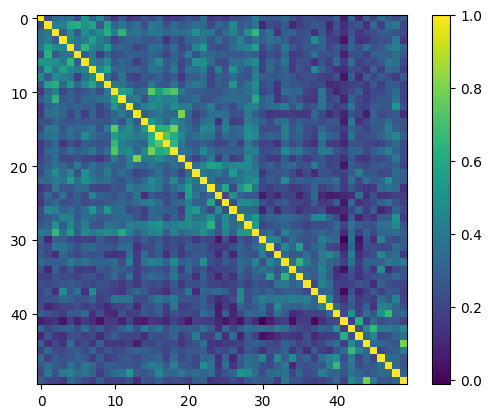

In [9]:

mat = np.corrcoef(embeddings)


plt.imshow(mat)
plt.colorbar()

[[0.47653431 0.2871686  0.33566878 0.24330899 0.23452187]
 [0.2871686  0.52328097 0.32322019 0.2566888  0.24387907]
 [0.33566878 0.32322019 0.46210536 0.24043931 0.24501957]
 [0.24330899 0.2566888  0.24043931 0.40907372 0.23637584]
 [0.23452187 0.24387907 0.24501957 0.23637584 0.40885373]]


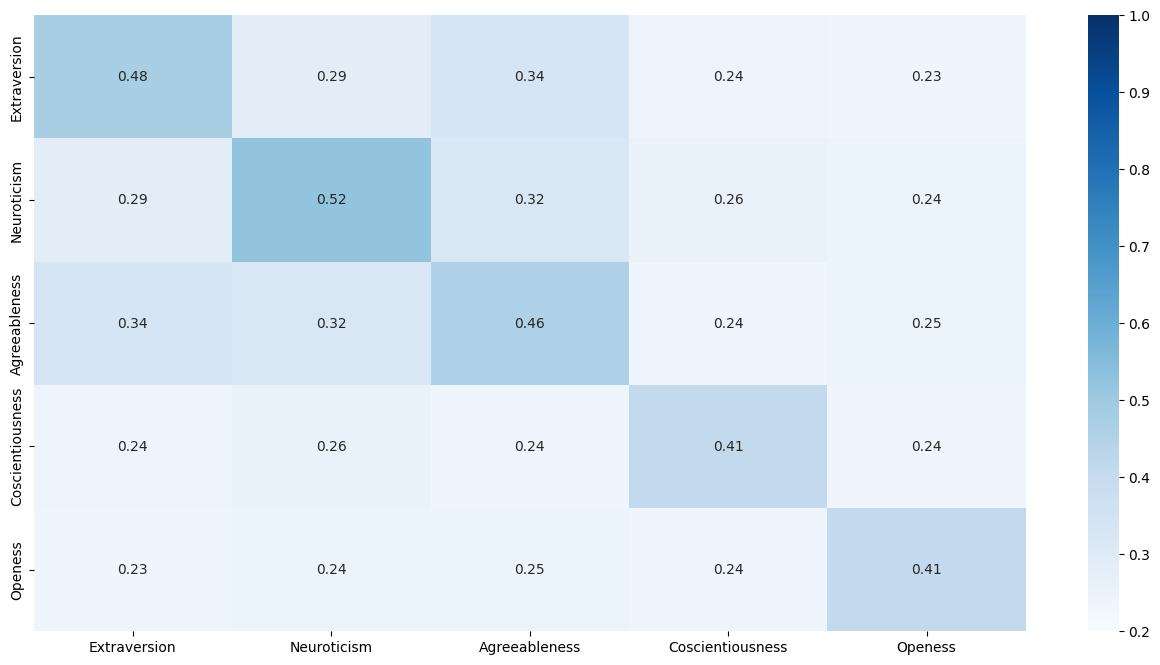

In [7]:
import matplotlib.pyplot as plt
import numpy as np

factors_names = ['Extraversion','Neuroticism', 'Agreeableness', 'Coscientiousness', 'Openess' ]
cross_corr_matrix_emb = np.zeros((n_factors,n_factors))
for i in range(n_factors):
  for j in range(n_factors):

    cross_corr_matrix_emb[i,j] = np.mean(mat[(i*n_items_per_factor):(i*n_items_per_factor)+n_items_per_factor,(j*n_items_per_factor):(j*n_items_per_factor)+n_items_per_factor])

print(cross_corr_matrix_emb)
plt.figure(figsize=(16, 8))
sns.heatmap(cross_corr_matrix_emb, yticklabels=factors_names, xticklabels=factors_names, fmt=".2f", vmax=1, vmin=0.2, annot=True,cmap="Blues")
plt.show()